In [128]:
import pandas as pd

In [129]:
demo = pd.read_csv("../data/raw/demographic.csv")

In [130]:
demo.shape

(10175, 47)

In [131]:
demo.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC',
       'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL',
       'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY',
       'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ',
       'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE',
       'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'WTINT2YR', 'WTMEC2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR'],
      dtype='object')

In [132]:
df_demo = demo[["RIDRETH3", "RIAGENDR", "RIDAGEYR", "DMDEDUC2", "DMDMARTL", "DMDHHSIZ", "INDFMPIR", "SEQN"]]

df_demo.loc[:, "DMDEDUC2"] = df_demo["DMDEDUC2"].fillna(df_demo["DMDEDUC2"].mode()[0])
df_demo.loc[:, "DMDMARTL"] = df_demo["DMDMARTL"].fillna(df_demo["DMDMARTL"].mode()[0])
df_demo.loc[:, "INDFMPIR"] = df_demo["INDFMPIR"].fillna(df_demo["INDFMPIR"].median())

In [133]:
df_demo.isnull().sum()

RIDRETH3    0
RIAGENDR    0
RIDAGEYR    0
DMDEDUC2    0
DMDMARTL    0
DMDHHSIZ    0
INDFMPIR    0
SEQN        0
dtype: int64

In [134]:
exam = pd.read_csv("../data/raw/examination.csv")

In [135]:
exam.shape

(9813, 224)

In [136]:
exam.columns

Index(['SEQN', 'PEASCST1', 'PEASCTM1', 'PEASCCT1', 'BPXCHR', 'BPAARM',
       'BPACSZ', 'BPXPLS', 'BPXPULS', 'BPXPTY',
       ...
       'CSXLEAOD', 'CSXSOAOD', 'CSXGRAOD', 'CSXONOD', 'CSXNGSOD', 'CSXSLTRT',
       'CSXSLTRG', 'CSXNART', 'CSXNARG', 'CSAEFFRT'],
      dtype='object', length=224)

In [137]:
[col for col in exam.columns if "BMI" in col or "BPX" in col]

['BPXCHR',
 'BPXPLS',
 'BPXPULS',
 'BPXPTY',
 'BPXML1',
 'BPXSY1',
 'BPXDI1',
 'BPXSY2',
 'BPXDI2',
 'BPXSY3',
 'BPXDI3',
 'BPXSY4',
 'BPXDI4',
 'BMIWT',
 'BMIRECUM',
 'BMIHEAD',
 'BMIHT',
 'BMXBMI',
 'BMDBMIC',
 'BMILEG',
 'BMIARML',
 'BMIARMC',
 'BMIWAIST']

In [138]:
exam_selected = exam[["SEQN", "BMXBMI", "BPXSY1", "BPXDI1"]].copy()

In [139]:
exam_selected.head()

,SEQN,BMXBMI,BPXSY1,BPXDI1
0,73557,26.7,122.0,72.0
1,73558,28.6,156.0,62.0
2,73559,28.9,140.0,90.0
3,73560,17.1,108.0,38.0
4,73561,19.7,136.0,86.0


In [140]:
merged_df = df_demo.merge(exam_selected, on = "SEQN", how = "inner")

In [141]:
merged_df.head()

,RIDRETH3,RIAGENDR,RIDAGEYR,DMDEDUC2,DMDMARTL,DMDHHSIZ,INDFMPIR,SEQN,BMXBMI,BPXSY1,BPXDI1
0,4,1,69,3.0,4.0,3,0.84,73557,26.7,122.0,72.0
1,3,1,54,3.0,1.0,4,1.78,73558,28.6,156.0,62.0
2,3,1,72,4.0,1.0,2,4.51,73559,28.9,140.0,90.0
3,3,1,9,4.0,1.0,4,2.52,73560,17.1,108.0,38.0
4,3,2,73,5.0,1.0,2,5.00,73561,19.7,136.0,86.0


In [142]:
merged_df.shape

(9813, 11)

In [143]:
merged_df.isnull().sum()

RIDRETH3       0
RIAGENDR       0
RIDAGEYR       0
DMDEDUC2       0
DMDMARTL       0
DMDHHSIZ       0
INDFMPIR       0
SEQN           0
BMXBMI       758
BPXSY1      2641
BPXDI1      2641
dtype: int64

In [144]:
merged_df.loc[:, "BMXBMI"] = merged_df["BMXBMI"].fillna(merged_df["BMXBMI"].median())
merged_df.loc[:, "BPXSY1"] = merged_df["BPXSY1"].fillna(merged_df["BPXSY1"].median())
merged_df.loc[:, "BPXDI1"] = merged_df["BPXDI1"].fillna(merged_df["BPXDI1"].median())

In [145]:
merged_df.isnull().sum()

RIDRETH3    0
RIAGENDR    0
RIDAGEYR    0
DMDEDUC2    0
DMDMARTL    0
DMDHHSIZ    0
INDFMPIR    0
SEQN        0
BMXBMI      0
BPXSY1      0
BPXDI1      0
dtype: int64

In [146]:
features2 = merged_df.drop(columns = ["SEQN"]).copy()
features2["RIAGENDR"] = features2["RIAGENDR"].map({1: 0, 2: 1})
features2 = pd.get_dummies(
    features2,
    columns = ["RIDRETH3", "DMDMARTL"],
    drop_first = True
)

In [147]:
features2.head()

,RIAGENDR,RIDAGEYR,DMDEDUC2,DMDHHSIZ,INDFMPIR,BMXBMI,BPXSY1,BPXDI1,RIDRETH3_2,RIDRETH3_3,RIDRETH3_4,RIDRETH3_6,RIDRETH3_7,DMDMARTL_2.0,DMDMARTL_3.0,DMDMARTL_4.0,DMDMARTL_5.0,DMDMARTL_6.0,DMDMARTL_77.0,DMDMARTL_99.0
0,0,69,3.0,3,0.84,26.7,122.0,72.0,False,False,True,False,False,False,False,True,False,False,False,False
1,0,54,3.0,4,1.78,28.6,156.0,62.0,False,True,False,False,False,False,False,False,False,False,False,False
2,0,72,4.0,2,4.51,28.9,140.0,90.0,False,True,False,False,False,False,False,False,False,False,False,False
3,0,9,4.0,4,2.52,17.1,108.0,38.0,False,True,False,False,False,False,False,False,False,False,False,False
4,1,73,5.0,2,5.00,19.7,136.0,86.0,False,True,False,False,False,False,False,False,False,False,False,False


In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features2 = scaler.fit_transform(features2)

scaled_df2 = pd.DataFrame(scaled_features2, columns = features2.columns)
scaled_df2.head()

,RIAGENDR,RIDAGEYR,DMDEDUC2,DMDHHSIZ,INDFMPIR,BMXBMI,BPXSY1,BPXDI1,RIDRETH3_2,RIDRETH3_3,RIDRETH3_4,RIDRETH3_6,RIDRETH3_7,DMDMARTL_2.0,DMDMARTL_3.0,DMDMARTL_4.0,DMDMARTL_5.0,DMDMARTL_6.0,DMDMARTL_77.0,DMDMARTL_99.0
0,-1.015508,1.531807,-0.757038,-0.510511,-0.869447,0.143520,0.287286,0.482300,-0.323565,-0.750883,1.861320,-0.340403,-0.217436,-0.210667,-0.263035,7.421205,-0.348916,-0.207214,-0.014278,-0.010095
1,-1.015508,0.916959,-0.757038,0.069309,-0.272224,0.392024,2.483279,-0.299621,-0.323565,1.331766,-0.537253,-0.340403,-0.217436,-0.210667,-0.263035,-0.134749,-0.348916,-0.207214,-0.014278,-0.010095
2,-1.015508,1.654776,0.284579,-1.090330,1.462267,0.431261,1.449871,1.889756,-0.323565,1.331766,-0.537253,-0.340403,-0.217436,-0.210667,-0.263035,-0.134749,-0.348916,-0.207214,-0.014278,-0.010095
3,-1.015508,-0.927582,0.284579,0.069309,0.197931,-1.112078,-0.616946,-2.176229,-0.323565,1.331766,-0.537253,-0.340403,-0.217436,-0.210667,-0.263035,-0.134749,-0.348916,-0.207214,-0.014278,-0.010095
4,0.984729,1.695766,1.326196,-1.090330,1.773585,-0.772020,1.191519,1.576988,-0.323565,1.331766,-0.537253,-0.340403,-0.217436,-0.210667,-0.263035,-0.134749,-0.348916,-0.207214,-0.014278,-0.010095


In [149]:
scaled_df2.shape

(9813, 20)

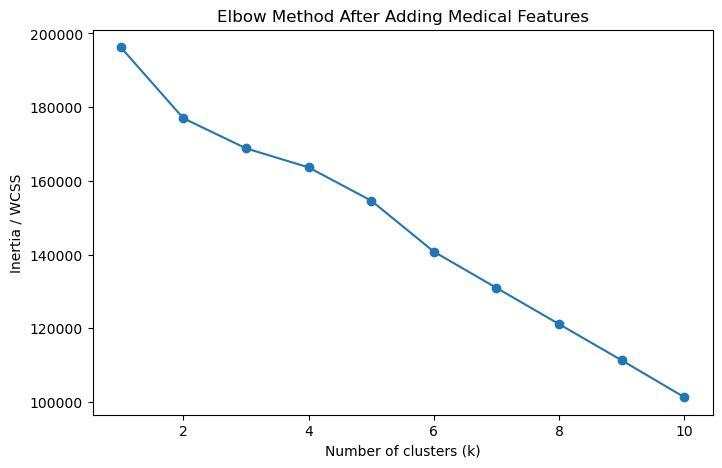

In [150]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia2 = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(scaled_df2)
    inertia2.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia2, marker = 'o')
plt.title("Elbow Method After Adding Medical Features")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia / WCSS")
plt.show()

In [151]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in [2,3]:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(scaled_df2)
    score = silhouette_score(scaled_df2, labels)
    print(f"k={k}, silhouette score={score}")

k=2, silhouette score=0.13847232396085402
k=3, silhouette score=0.08287364945130551


In [152]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

X2 = scaled_df2

kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans_labels = kmeans.fit_predict(X2)
kmeans_sil = silhouette_score(X2, kmeans_labels)
print("KMeans silhouette score: ", kmeans_sil)

agg = AgglomerativeClustering(n_clusters = 2)
agg_labels = agg.fit_predict(X2)
agg_sil = silhouette_score(X2, agg_labels)
print("Agglomerative silhouette score: ", agg_sil)

gmm = GaussianMixture(n_components = 2, random_state = 42)
gmm_labels = gmm.fit_predict(X2)
gmm_sil = silhouette_score(X2, gmm_labels)
print("Gaussian silhouette score: ", gmm_sil)

KMeans silhouette score:  0.13847232396085402
Agglomerative silhouette score:  0.11617074090162774
Gaussian silhouette score:  0.2731329018428454


In [153]:
scaled_df2["Cluster"] = gmm_labels

In [154]:
scaled_df2["Cluster"].value_counts()

Cluster
1    8583
0    1230
Name: count, dtype: int64

In [155]:
cluster_profile2 = scaled_df2.groupby("Cluster").mean()
cluster_profile2

,RIAGENDR,RIDAGEYR,DMDEDUC2,DMDHHSIZ,INDFMPIR,BMXBMI,BPXSY1,BPXDI1,RIDRETH3_2,RIDRETH3_3,RIDRETH3_4,RIDRETH3_6,RIDRETH3_7,DMDMARTL_2.0,DMDMARTL_3.0,DMDMARTL_4.0,DMDMARTL_5.0,DMDMARTL_6.0,DMDMARTL_77.0,DMDMARTL_99.0
Cluster,,,,,,,,,,,,,,,,,,,,
0,0.309852,1.153234,-0.422535,-0.852274,-0.132621,0.495562,0.609176,0.287646,-0.015460,0.204088,0.051665,-0.135189,-0.096045,1.470045,1.835468,0.940285,-0.348916,-0.207214,0.099631,0.070446
1,-0.044404,-0.165266,0.060552,0.122136,0.019005,-0.071017,-0.087299,-0.041222,0.002216,-0.029247,-0.007404,0.019374,0.013764,-0.210667,-0.263035,-0.134749,0.050002,0.029695,-0.014278,-0.010095


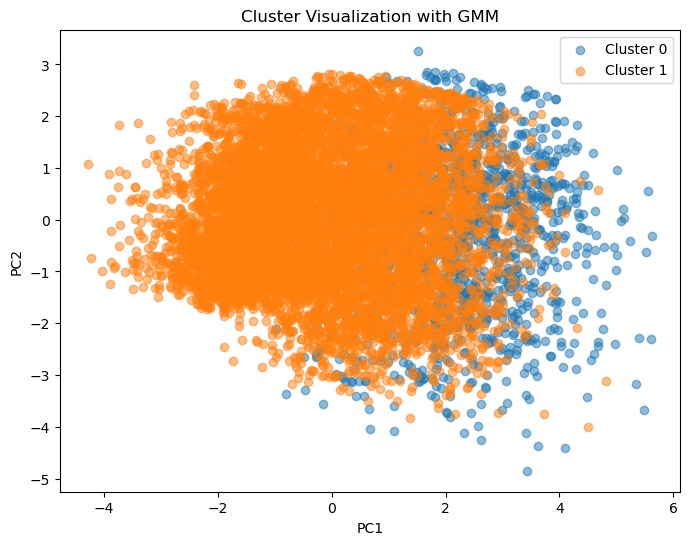

In [156]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data2 = pca.fit_transform(scaled_df2.drop(columns = ["Cluster"]))
pca_df2 = pd.DataFrame(pca_data2, columns = ["PC1", "PC2"])
pca_df2["Cluster"] = scaled_df2["Cluster"]

plt.figure(figsize=(8,6))
plt.scatter(pca_df2[pca_df2.Cluster == 0]["PC1"], pca_df2[pca_df2.Cluster == 0]["PC2"], alpha = 0.5, label = "Cluster 0")
plt.scatter(pca_df2[pca_df2.Cluster == 1]["PC1"], pca_df2[pca_df2.Cluster == 1]["PC2"], alpha = 0.5, label = "Cluster 1")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cluster Visualization with GMM")
plt.legend()
plt.show()